In [1]:
import rasterio as rio
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")


In [2]:
### define dem cmap
colors = [(128/255, 205/255, 193/255), (245/255, 245/255, 245/255), \
          (223/255, 194/255, 125/255), (166/255, 97/255, 26/255)]
cmap_dem = LinearSegmentedColormap.from_list('linear color', colors)


In [46]:
path_srtm = 'data/dem/hma_SRTMGL3_500m.tif'
path_hma_gtng = 'data/hma-extent/HMA/gtng_202307_hma_subregions.gpkg'


#### 1. hma dem map

In [5]:
hma_vec_gdf = gpd.read_file(path_hma_gtng)
with rio.open(path_srtm) as dem_rio:
    dem_meta = dem_rio.meta
    dem_bounds = dem_rio.bounds
    dem_arr = dem_rio.read(1)
dem_extent = [dem_bounds.left, dem_bounds.right, dem_bounds.bottom, dem_bounds.top]


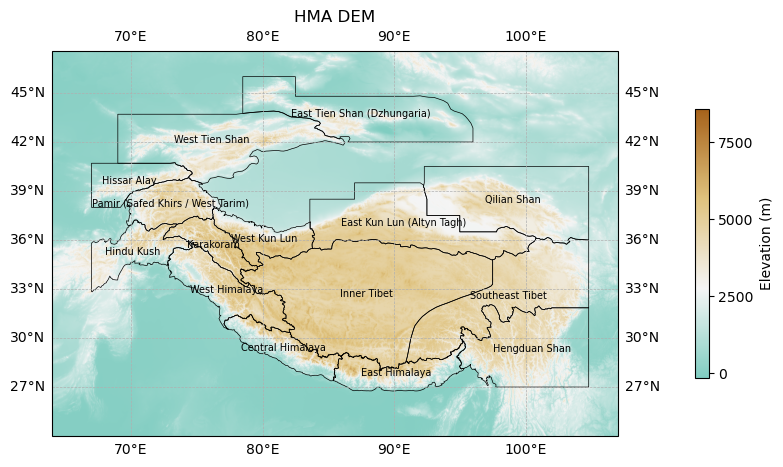

In [16]:
fig, ax = plt.subplots(figsize=(10, 5), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([64,107,24,45.5])
im_show = ax.imshow(dem_arr, cmap=cmap_dem, extent=dem_extent)
hma_vec_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)
ax.set_title('HMA DEM', fontsize=12)
fig.colorbar(im_show, ax=ax, orientation='vertical',pad=0.1,
             label='Elevation (m)', shrink=0.7, ticks=[0, 2500, 5000, 7500])
## add names of subregions
geo_centers = hma_vec_gdf.geometry.centroid  ## ignore the warning 
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_vec_gdf['full_name']):
    ax.text(x, y, label, fontsize=7, ha='center', va='center')
ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
# fig.savefig('figures/dem/hma_dem.png', dpi=300, bbox_inches='tight')


#### 2. hma subregion dem map

In [ ]:
path_subregion_dem = 'data/dem/hma-subregions/dem_90m_central_himalaya.tif'
path_hma_gtng = 'data/hma-extent/HMA/gtng_202307_hma_subregions.gpkg'
hma_gdf = gpd.read_file(path_hma_gtng)
hma_subregion_gdf = hma_gdf.loc[hma_gdf['full_name'] == 'Central Himalaya', :]


In [ ]:
with rio.open(path_subregion_dem) as dem_subregion_rio:
    dem_subregion_meta = dem_subregion_rio.meta
    dem_subregion_bounds = dem_subregion_rio.bounds
    dem_subregion_arr = dem_subregion_rio.read(1)
dem_subregion_arr = dem_subregion_arr.astype(np.float32)
dem_subregion_arr[dem_subregion_arr == 0] = np.nan
dem_subregion_extent = [dem_subregion_bounds.left, dem_subregion_bounds.right, 
                        dem_subregion_bounds.bottom, dem_subregion_bounds.top]


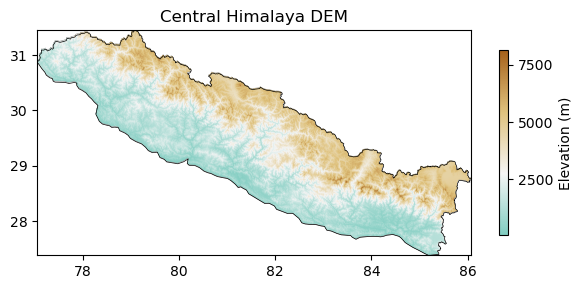

In [63]:
fig, ax = plt.subplots(figsize=(7, 4))
im_show = ax.imshow(dem_subregion_arr, cmap=cmap_dem, extent=dem_subregion_extent)
hma_subregion_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)
fig.colorbar(im_show, ax=ax, orientation='vertical', 
             label='Elevation (m)', shrink=0.6, ticks=[0, 2500, 5000, 7500])
ax.set_title('Central Himalaya DEM', fontsize=12)
# fig.savefig('figures/dem/central_himalaya_dem.png', dpi=300, bbox_inches='tight')
